In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import sem
import matplotlib.pyplot as plt

In [2]:
L = 718 - 10
sigma_L = 2

pos1 = pd.DataFrame({'right (mm)': [8.09, 8.08, 8.08, 8.07],
                  'left (mm)': [7.93, 7.95, 7.93, 7.93]})

pos2 = pd.DataFrame({'left (mm)': [0.64, 0.63, 0.70, 0.63],
                  'right (mm)': [3.51, 3.51, 3.53, 3.52]})

pos1['d (mm)'] = pos1['right (mm)'] - pos1['left (mm)']
pos2['d (mm)'] = pos2['right (mm)'] - pos2['left (mm)']

d1, d2 = pos1['d (mm)'].mean(), pos2['d (mm)'].mean()
sigma_d1, sigma_d2 = pos1['d (mm)'].sem(), pos2['d (mm)'].sem()

d = np.sqrt(d1 * d2)
sigma_d = d * np.sqrt( 0.5*(sigma_d1/d1)**2 + 0.5*(sigma_d2/d2)**2)

data= pd.DataFrame()
data['x (mm)'] = pd.Series([1.65, 2.26, 2.98, 3.63, 4.24, 4.89,
                5.55, 6.19, 6.84, 7.49, 8.16, 8.78, 9.42, 10.11, 10.75,
                11.39])
data.insert(0, 'i', data.index)

data
print(sigma_d1/d1, sigma_d2/d2)

0.044517049956407255 0.004585798848607813


slope = 0.649 mm, error = 0.001 mm
λ = 591 nm, error = 19 nm
Error contributions:  0.0015910363329268097 0.03164488337710499 0.002824858757062147


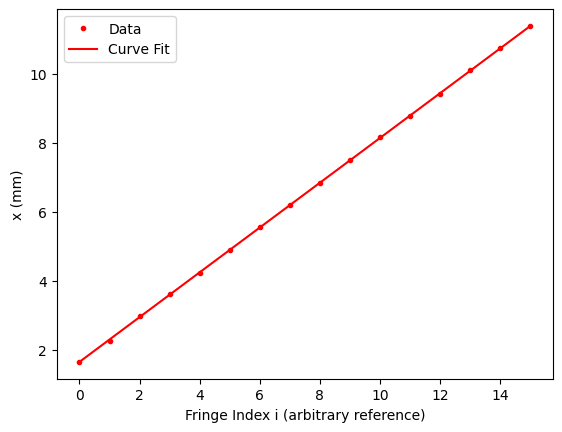

In [3]:
x = data['i'].to_numpy()
y = data['x (mm)'].to_numpy()

para, para_cov = np.polyfit(x, y, 1, cov=True)

m = para[0]
sigma_m = para_cov[0, 0]**0.5
print(f'slope = {m:.3g} mm, error = {sigma_m:.1g} mm')

λ = m * d / L;
sigma_λ = λ * np.sqrt((sigma_m/m)**2 + (sigma_d/d)**2 + (sigma_L/L)**2)

print(f'λ = {λ*1e6:.0f} nm, error = {sigma_λ*1e6:.0f} nm')
print('Error contributions: ', sigma_m/m, sigma_d/d, sigma_L/L)

plt.plot(x ,y ,'.', color = "red", label = "Data")

x_reg = np.linspace(x.min(), x.max(), 10)
y_reg = (x_reg * λ * L / d) + para[1];
plt.plot(x_reg, y_reg, '-', color = "red", label = "Curve Fit")
plt.xlabel('Fringe Index i (arbitrary reference)')
plt.ylabel('x (mm)')

plt.legend()
plt.show()